import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt # Visualization
import seaborn as sns #Visualization
import matplotlib.pyplot as plt
%matplotlib inline
dataset = pd.read_csv('C:\\Users\\chang\\Documents\\DataforAnalytics\\WHR_Data1.csv')
dataset.shape

In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1886 entries, 0 to 1885
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           1886 non-null   object 
 1   Regional_Indicator                1886 non-null   object 
 2   Year                              1886 non-null   int64  
 3   Happiness_Score                   1886 non-null   float64
 4   GDP_Per_Capita                    1886 non-null   float64
 5   Social_Support                    1886 non-null   float64
 6   Healthy_Life_Expectancy_At_Birth  1886 non-null   float64
 7   Freedom_To_Make_Life_Choices      1886 non-null   float64
 8   Generosity                        1886 non-null   float64
 9   Perceptions_Of_Corruption         1886 non-null   float64
 10  Positive_Affect                   1886 non-null   float64
 11  Negative_Affect                   1886 non-null   float64
dtypes: flo

In [18]:
dataset.head()

,Country,Regional_Indicator,Year,Happiness_Score,GDP_Per_Capita,Social_Support,Healthy_Life_Expectancy_At_Birth,Freedom_To_Make_Life_Choices,Generosity,Perceptions_Of_Corruption,Positive_Affect,Negative_Affect
0,Afghanistan,South Asia,2014,3.130896,7.718354,0.525568,52.880001,0.508514,0.104013,0.871242,0.531691,0.374861
1,Afghanistan,South Asia,2015,3.982855,7.701992,0.528597,53.200001,0.388928,0.079864,0.880638,0.553553,0.339276
2,Afghanistan,South Asia,2016,4.220169,7.696560,0.559072,53.000000,0.522566,0.042265,0.793246,0.564953,0.348332
3,Afghanistan,South Asia,2017,2.661718,7.697381,0.490880,52.799999,0.427011,-0.121303,0.954393,0.496349,0.371326
4,Afghanistan,South Asia,2008,3.723590,7.370100,0.450662,50.799999,0.718114,0.167640,0.881686,0.517637,0.258195


In [20]:
list(dataset.columns)

['Country',
 'Regional_Indicator',
 'Year',
 'Happiness_Score',
 'GDP_Per_Capita',
 'Social_Support',
 'Healthy_Life_Expectancy_At_Birth',
 'Freedom_To_Make_Life_Choices',
 'Generosity',
 'Perceptions_Of_Corruption',
 'Positive_Affect',
 'Negative_Affect']

In [21]:
dataset.rename(columns ={'Regional_Indicator': 'Region', 'Happiness_Score': 'HappyScore','GDP_Per_Capita': 'GDP'
                        ,'Social_Support': 'SocialSupport', 'Healthy_Life_Expectancy_At_Birth': 'HealthLife'
                        ,'Freedom_To_Make_Life_Choices': 'Freedom', 'Perceptions_Of_Corruption': 'Corruption'
                        , 'Positive_Affect': 'Positive', 'Negative_Affect': 'Negative'}, inplace = True )
dataset.head()

,Country,Region,Year,HappyScore,GDP,SocialSupport,HealthLife,Freedom,Generosity,Corruption,Positive,Negative
0,Afghanistan,South Asia,2014,3.130896,7.718354,0.525568,52.880001,0.508514,0.104013,0.871242,0.531691,0.374861
1,Afghanistan,South Asia,2015,3.982855,7.701992,0.528597,53.200001,0.388928,0.079864,0.880638,0.553553,0.339276
2,Afghanistan,South Asia,2016,4.220169,7.696560,0.559072,53.000000,0.522566,0.042265,0.793246,0.564953,0.348332
3,Afghanistan,South Asia,2017,2.661718,7.697381,0.490880,52.799999,0.427011,-0.121303,0.954393,0.496349,0.371326
4,Afghanistan,South Asia,2008,3.723590,7.370100,0.450662,50.799999,0.718114,0.167640,0.881686,0.517637,0.258195


Text(0.5, 1.0, 'Happy Score Per Region')

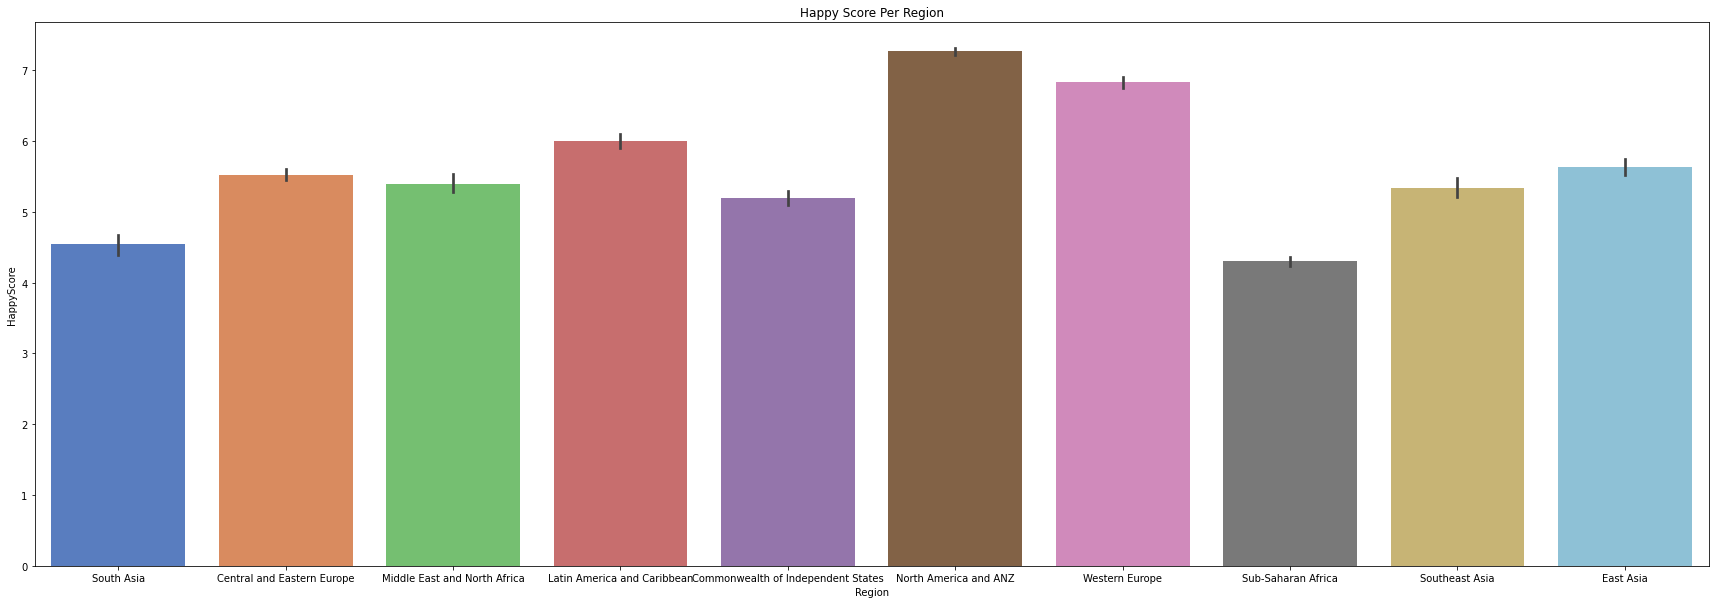

In [22]:
#Create a bargraph to compare happiness score between region
plt.figure(figsize=(30,10))
sns.barplot(x='Region', y='HappyScore', data=dataset,palette='muted')
plt.title('Happy Score Per Region')

Text(0.5, 1.0, 'Scatter plot of HealthLife vs Happiness Score')

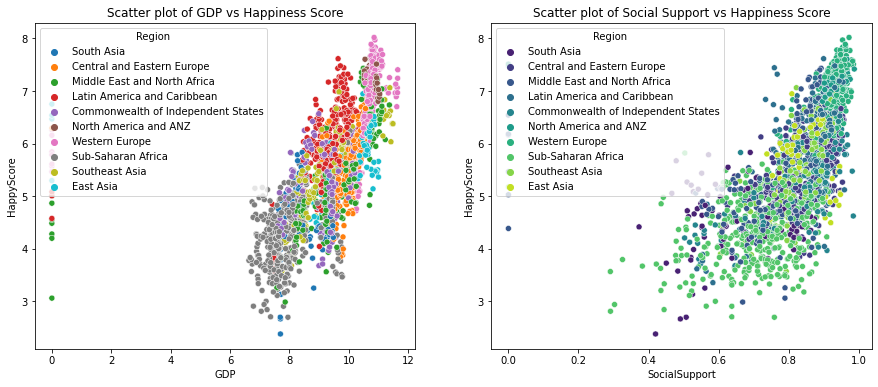

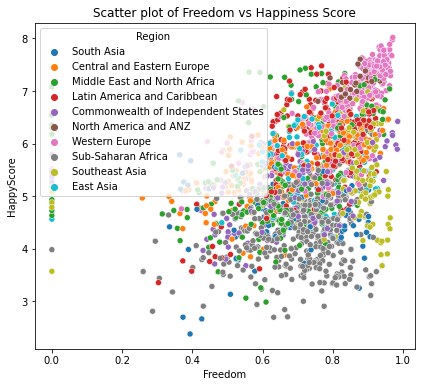

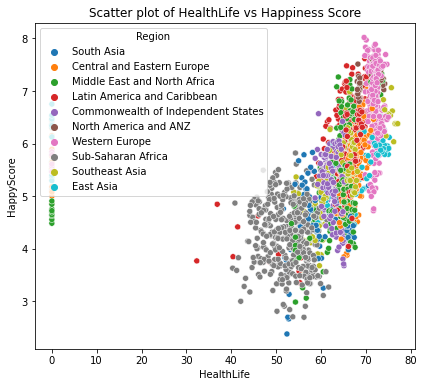

In [23]:
# Create correlation datset between Happiness Scoere and other datasets
f = plt.figure(figsize=(15,6))
ax = f.add_subplot(121)
sns.scatterplot(x='GDP',y='HappyScore',data=dataset, hue='Region',ax=ax)
ax.set_title('Scatter plot of GDP vs Happiness Score')

ax = f.add_subplot(122)
sns.scatterplot(x='SocialSupport',y='HappyScore',data=dataset, hue='Region', palette='viridis', ax=ax)
ax.set_title('Scatter plot of Social Support vs Happiness Score')
plt.savefig('sc.png');

f = plt.figure(figsize=(15,6))
ax = f.add_subplot(121)
sns.scatterplot(x='Freedom',y='HappyScore',data=dataset, hue='Region',ax=ax)
ax.set_title('Scatter plot of Freedom vs Happiness Score')

f = plt.figure(figsize=(15,6))
ax = f.add_subplot(122)
sns.scatterplot(x='HealthLife',y='HappyScore',data=dataset, hue='Region',ax=ax)
ax.set_title('Scatter plot of HealthLife vs Happiness Score')


In [24]:
# Drop country and region columns
newdata = pd.DataFrame(dataset)
newdata.drop(newdata.iloc[:, :2], inplace = True, axis = 1)
#Set the X andd y varible
X = pd.DataFrame(newdata.drop('HappyScore', axis =1))
y = pd.DataFrame(newdata['HappyScore'])         

In [25]:
# Import scikit_learn linear Regression model
# Fit the dataset into the Linear Regression model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [26]:
import statsmodels.api as sm
X = sm.add_constant(X)
model= sm.OLS(y, X).fit()
print(model.summary())
#R-squaerd = The amount of the variation in the output dependent attribute which is predictable from the input independent variable

                            OLS Regression Results                            
Dep. Variable:             HappyScore   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     309.3
Date:                Tue, 07 Dec 2021   Prob (F-statistic):               0.00
Time:                        21:53:57   Log-Likelihood:                -2015.1
No. Observations:                1886   AIC:                             4050.
Df Residuals:                    1876   BIC:                             4106.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -7.8398      8.310     -0.943

In [27]:
# Find the model intercept
lr.intercept_
print('The intercept:', lr.intercept_)

The intercept: [-5.56025929]


In [28]:
# Find the model coefficent
lr.coef_
print('The coefficent:', lr.coef_)

The coefficent: [[ 0.00257282  0.24045178  2.55268376  0.01063586  0.65478399  0.45470536
  -0.59012399  1.35175787 -0.40199445]]


In [29]:
#The average difference between test value and predict value
y_pred = lr.predict(X_test)
from sklearn.metrics import mean_squared_error
mean = mean_squared_error(y_pred, y_test)
print(mean)

0.525425118417223


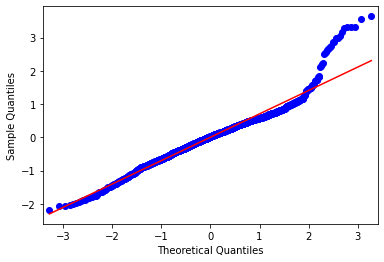

In [30]:
#Analyze the residual of the model
sm.qqplot(model.resid, line='s');

In [38]:
dataset.loc[dataset["Country"] == "United States", "HappyScore"].value_counts()

7.163616    1
7.115139    1
7.181794    1
7.158032    1
6.943701    1
7.280386    1
7.512688    1
7.249285    1
6.803600    1
6.991759    1
7.151114    1
7.028088    1
7.026227    1
6.882685    1
6.863947    1
Name: HappyScore, dtype: int64

In [18]:
# Make a new Y prediction with the new X values
y = lr.predict([[2021,7.5,0.5,65,0.7,0.1,0.7,0.5,0.2]])
print(y)`

[[4.09668458]]
